# Matplotlib 入門

グラフの描画を行う場合に Matplotlib が便利です。
Google Colab では標準でプロットを行うと結果が表示されますが、ローカルの Jupyter Notebook の場合、グラフが Notebook 内に描画されない可能性があるため、`%matplotlib inline` を最初に設定しておきます。
Matplotlib は `matplotlib.pyplot` を `plt` として短縮形で読み込むことが一般的です。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

この章で用いるデータセットは前章と同じように Google Colaboratory で用意されているサンプルデータを使用します。
Google Colaboratory 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)をダウンロードして、使用してください。


まず、Pandas で CSV ファイルを読み込みます。

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('sample_data/california_housing_train.csv')

## 散布図

**散布図 (scatter)** は変数間の相関を確認するために便利なグラフです。Matplotlibでは散布図を作成する `scatter()` が用意されています。

最も強い相関を持っていた `median_income`と`median_house_value` の散布図と、逆に最も弱い相関であった `pupulation` と `median_house_value` の散布図を確認します。

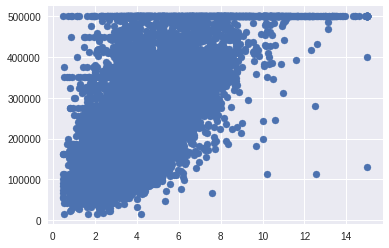

In [4]:
plt.scatter(df['median_income'], df['median_house_value'])

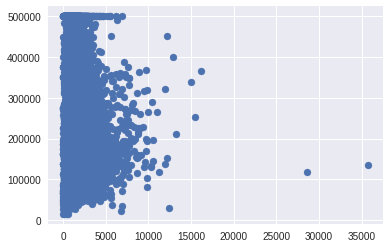

In [5]:
plt.scatter(df['population'], df['median_house_value'])

## ヒストグラム

データの分布を確認するためによく使われるグラフの一つとして、**ヒストグラム (histogram)** があります。
各階級に所属するサンプルの数を計算し、棒グラフで表示しています。
棒グラフ単体は `bar` が用意されていますが、ヒストグラムは `hist` を用います。

(array([ 731., 2958., 3362., 3127., 2291., 1426., 1036.,  629.,  395.,
        1045.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

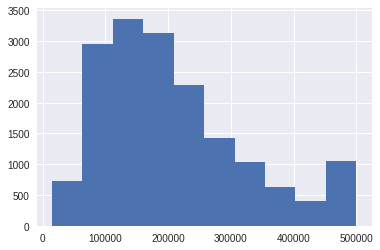

In [6]:
plt.hist(df['median_house_value'])

(array([  8.,  12.,  51., 214., 446., 559., 463., 658., 704., 574., 685.,
        588., 675., 670., 744., 799., 627., 684., 584., 433., 500., 547.,
        484., 406., 358., 370., 362., 267., 257., 166., 184., 197., 199.,
        216., 240., 159., 134., 126.,  98., 112.,  88.,  80.,  69.,  67.,
         91.,  50.,  42.,  44.,  42., 867.]),
 array([ 14999.  ,  24699.04,  34399.08,  44099.12,  53799.16,  63499.2 ,
         73199.24,  82899.28,  92599.32, 102299.36, 111999.4 , 121699.44,
        131399.48, 141099.52, 150799.56, 160499.6 , 170199.64, 179899.68,
        189599.72, 199299.76, 208999.8 , 218699.84, 228399.88, 238099.92,
        247799.96, 257500.  , 267200.04, 276900.08, 286600.12, 296300.16,
        306000.2 , 315700.24, 325400.28, 335100.32, 344800.36, 354500.4 ,
        364200.44, 373900.48, 383600.52, 393300.56, 403000.6 , 412700.64,
        422400.68, 432100.72, 441800.76, 451500.8 , 461200.84, 470900.88,
        480600.92, 490300.96, 500001.  ]),
 <a list of 50 Patch ob

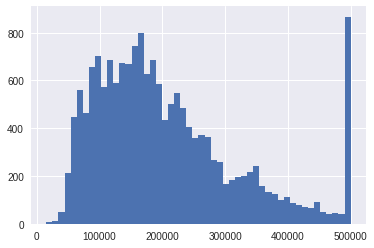

In [7]:
# bins を指定することで、階級の細かさを調整できます
plt.hist(df['median_house_value'], bins=50)

上記のグラフからわかる通り、500,000 周辺に外れたデータの分布が存在していることがわかります。
ヒストグラムを確認することで、どのような分布に従っているか、外れ値は存在するかなどを直感的に把握することができます。

## 箱ひげ図

**箱ひげ図 (box plot)** では、データのばらつきをわかりやすく表現するための統計図であり、データの概要として`pandas.DataFrame.describe()` でも確認していた統計量を可視化することができます。  
下から、最小値、第一四分位点、中央値、第三四分位点、最大値を表しています。

{'boxes': [<matplotlib.lines.Line2D at 0x7fe7e9c6b5f8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe7e9c6be80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe7e9c76940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe7e9c765c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe7e9c6b780>,
  <matplotlib.lines.Line2D at 0x7fe7e9c6bb00>]}

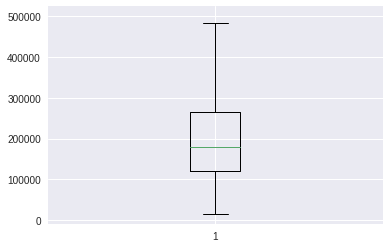

In [8]:
plt.boxplot(df['median_house_value'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe7e9c4b978>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe7e9c51240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe7e9c51cc0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe7e9c51940>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe7e9c4bb00>,
  <matplotlib.lines.Line2D at 0x7fe7e9bdc780>]}

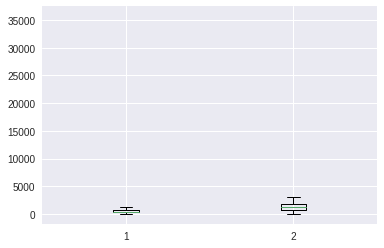

In [9]:
# 複数指定する場合は、タプルを用います
plt.boxplot((df['total_bedrooms'], df['population']))

## 折れ線グラフ

時系列データなどを表示する際に便利なグラフであり、`plot` という関数名で用意されています。

`plot(y)` のように引数が 1 つの場合は、`y` が縦軸の値に対応し、 横軸はサンプルの数となります。
実際に、NumPy を利用してデータを作成し、`plot()` で表示してみます。

In [10]:
import numpy as np

In [11]:
# [0,10]の間を100分割して数値を返す
x = np.linspace(0, 10, 100)

# xの値に乱数を加える
y = x + np.random.randn(100)

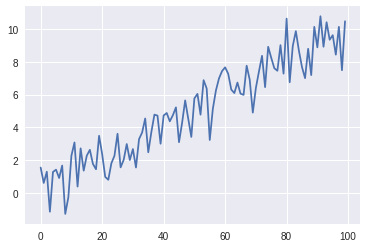

In [12]:
plt.plot(y)

`plot(x, y)` のように引数が 2 つの場合は、`x` が横軸、`y` が縦軸に対応します。

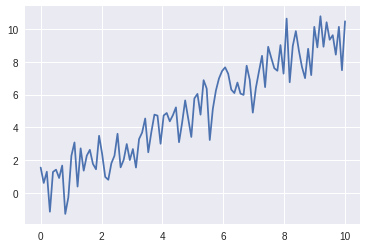

In [13]:
plt.plot(x, y)

## グラフの調整

Matplotlib では横軸や縦軸のラベルの設定や、グラフの大きさの調整、文字の色や大きさの調整など、細かく指定することができます。
この調整に関しては割愛しますが、[公式ページ](https://matplotlib.org/) や技術ブログなどを参考に、調べて使いながら覚えていくことをおすすめします。

## seaborn

Matplotlib を統計系の描画に特化させて、さらに使いやすくしたパッケージとして seaborn が有名です。

In [14]:
import seaborn as sns

データの分布を確認するときに、Matplotlib のヒストグラムよりもわかりやすい `distplot` がおすすめです。

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


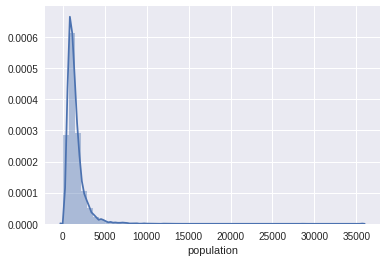

In [15]:
sns.distplot(df['population'])

また、描画まで少し時間がかかりますが、相関関係をすべて描画することができる `pairplot` もおすすめです。

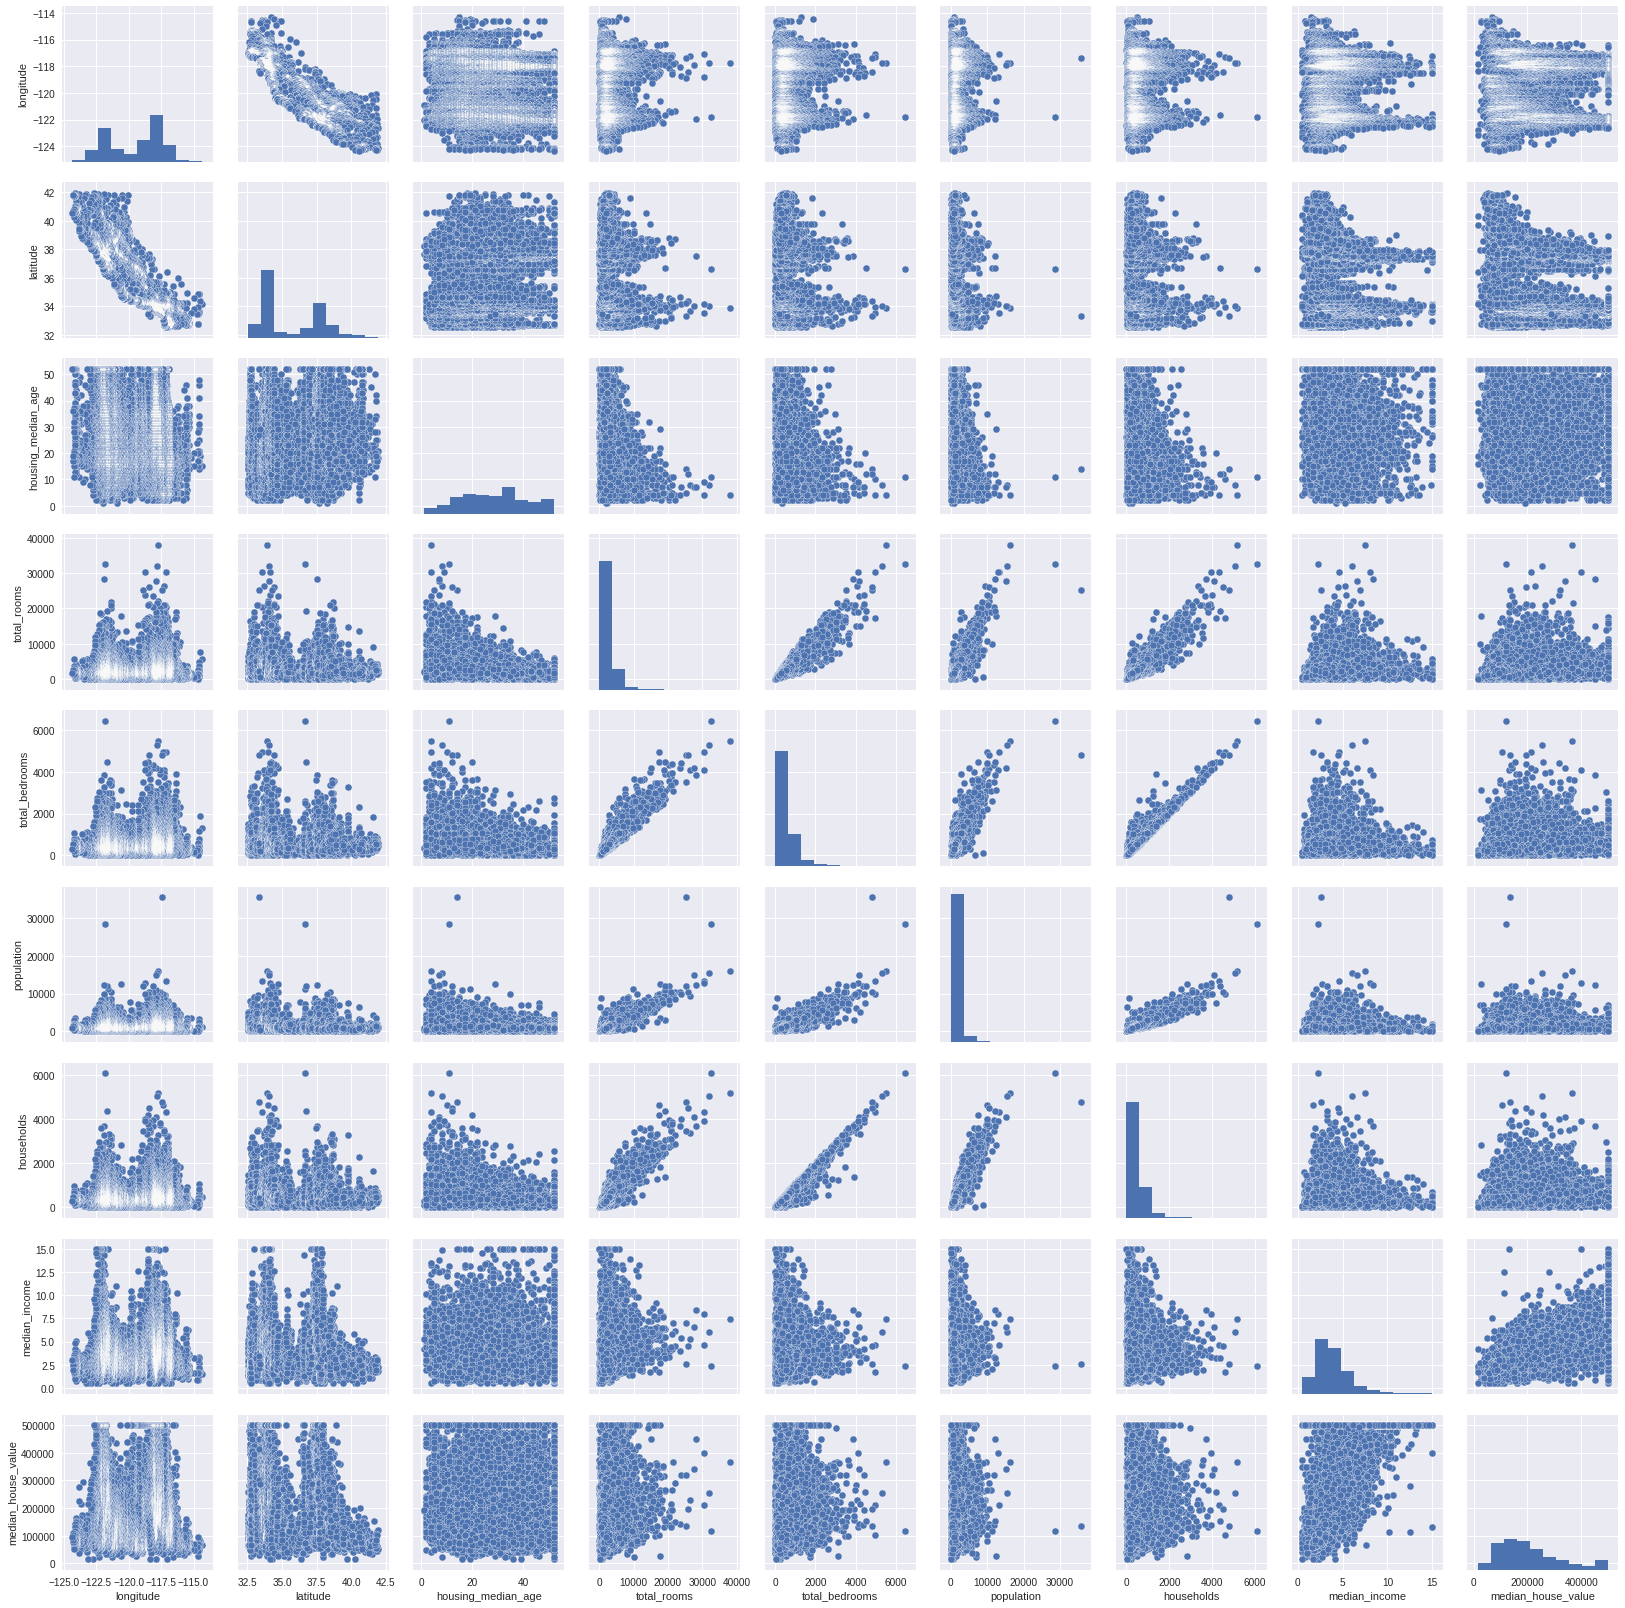

In [16]:
sns.pairplot(df)

seaborn も様々な種類のグラフが用意されているため、[公式ページ](https://seaborn.pydata.org/) や技術ブログで調べながら使ってみましょう。